In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D

In [82]:
datasets = pd.DataFrame (pd.read_csv('/content/drive/MyDrive/ADATASETS/Tetuan City power consumption.csv'))
datasets.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [83]:
datasets.shape

(52416, 9)

In [84]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [85]:
datasets.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [86]:
datasets.isnull().sum()*100/datasets.shape[0]

DateTime                     0.0
Temperature                  0.0
Humidity                     0.0
Wind Speed                   0.0
general diffuse flows        0.0
diffuse flows                0.0
Zone 1 Power Consumption     0.0
Zone 2  Power Consumption    0.0
Zone 3  Power Consumption    0.0
dtype: float64

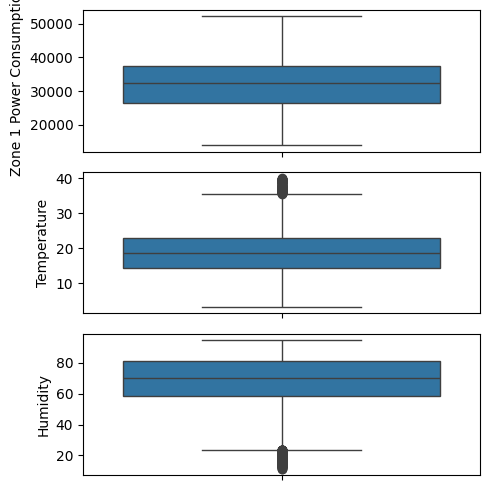

In [87]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(datasets['Zone 1 Power Consumption'], ax = axs[0])
plt2 = sns.boxplot(datasets['Temperature'], ax = axs[1])
plt3 = sns.boxplot(datasets['Humidity'], ax = axs[2])
plt.tight_layout()

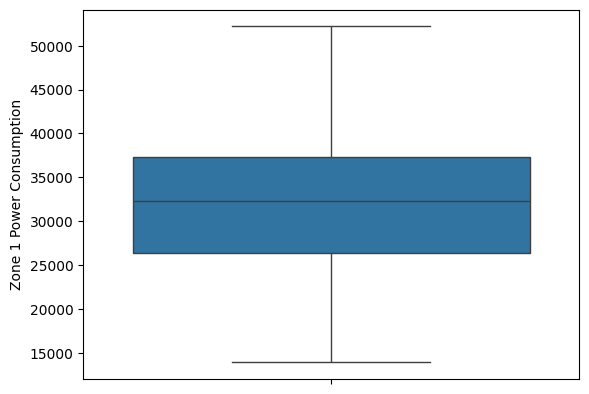

In [88]:
sns.boxplot(datasets['Zone 1 Power Consumption'])
plt.show()

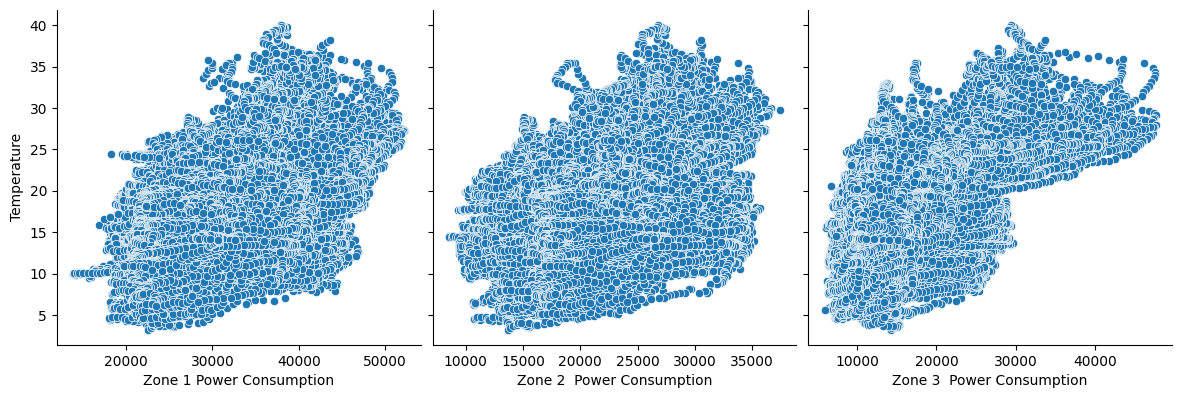

In [89]:
# Let's see how are they related with other variables using scatter plot.
sns.pairplot(datasets, x_vars=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'], y_vars='Temperature', height=4, aspect=1, kind='scatter')
plt.show()

In [90]:
X = datasets['Temperature']
y = datasets['Zone 1 Power Consumption']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 50)

In [92]:
X_train.head()

7139     13.78
45694    15.52
34237    25.69
35805    26.86
4601      9.99
Name: Temperature, dtype: float64

In [93]:
y_train.head()

7139     33480.00000
45694    21378.46154
34237    37213.05216
35805    32043.18584
4601     37031.18644
Name: Zone 1 Power Consumption, dtype: float64

Intercept: 22130.344522926076
Coefficient: [542.03761747]


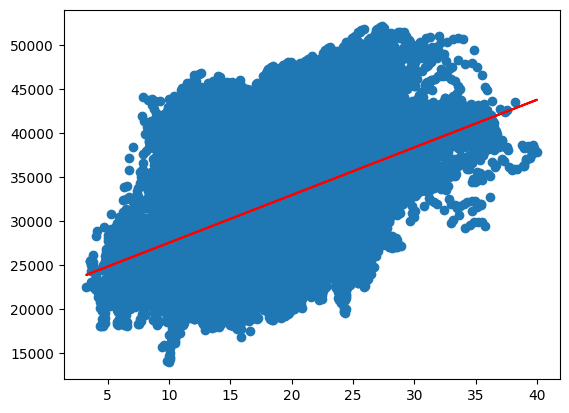

<ipython-input-94-fc8a77c985f6>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res_sklearn, bins=15)


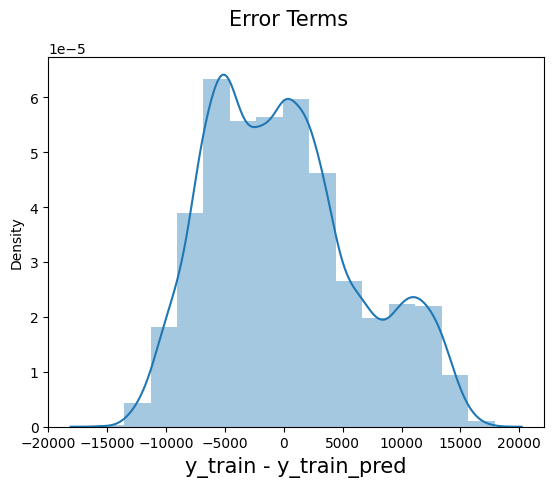

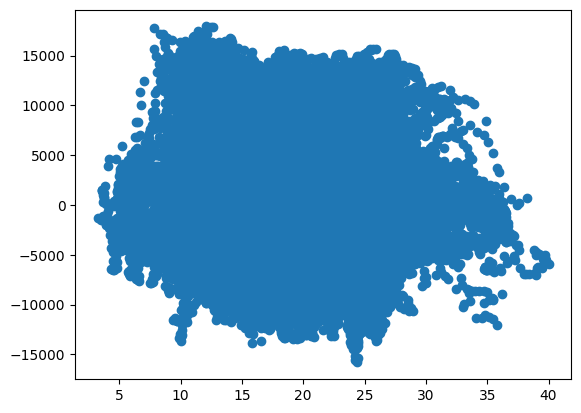

RMSE: 6436.838237071759
R-squared: 0.18932404284715576


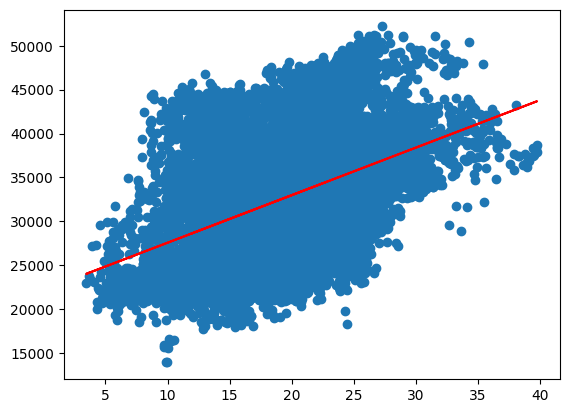

In [94]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
# Fit the resgression line using 'OLS'
lr_sklearn = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

# Print the parameters (intercept and slope) for Scikit-learn models
print("Intercept:", lr_sklearn.intercept_)
print("Coefficient:", lr_sklearn.coef_)

# There's no direct equivalent of lr.summary() in scikit-learn.
# You can print the intercept, coefficients, and any other relevant metrics separately.

# Scatter plot with the regression line for Scikit-learn models
plt.scatter(X_train, y_train)
plt.plot(X_train, lr_sklearn.predict(X_train.values.reshape(-1, 1)), 'r')
plt.show()

# Predictions and residuals for Scikit-learn models
y_train_pred_sklearn = lr_sklearn.predict(X_train.values.reshape(-1, 1))
res_sklearn = y_train - y_train_pred_sklearn

# Plot the distribution of error terms for Scikit-learn models
fig = plt.figure()
sns.distplot(res_sklearn, bins=15)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot of residuals for Scikit-learn models
plt.scatter(X_train, res_sklearn)
plt.show()

# Predictions on the test set for Scikit-learn models
y_pred_sklearn = lr_sklearn.predict(X_test.values.reshape(-1, 1))

# Calculate RMSE for Scikit-learn models
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
print("RMSE:", rmse_sklearn)

# Calculate R-squared for Scikit-learn models
r_squared_sklearn = r2_score(y_test, y_pred_sklearn)
print("R-squared:", r_squared_sklearn)

# Scatter plot of test set with regression line for Scikit-learn models
plt.scatter(X_test, y_test)
plt.plot(X_test, lr_sklearn.predict(X_test.values.reshape(-1, 1)), 'r')
plt.show()


In [95]:
# Calculate Mean Squared Error (MSE) for Scikit-learn models
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

# Calculate Mean Absolute Error (MAE) for Scikit-learn models
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)

# Display the summary
print("=== Summary ===")
print("Intercept:", lr_sklearn.intercept_)
print("Coefficient:", lr_sklearn.coef_)
print("MSE:", mse_sklearn)
print("MAE:", mae_sklearn)
print("RMSE:", rmse_sklearn)
print("R-squared:", r_squared_sklearn)

=== Summary ===
Intercept: 22130.344522926076
Coefficient: [542.03761747]
MSE: 41432886.49022907
MAE: 5279.381318432095
RMSE: 6436.838237071759
R-squared: 0.18932404284715576
